# Riddler Express on June 2, 2017


## Question

How many games would we expect to be needed to complete a best-of-seven series if each team has a 50 percent chance of winning each individual game? How about if one team has a 60 percent chance of winning each game? How about 70?

## Answer, analytical method

First I wil consider the problem analytically. I will call $p$ the probability of the favorite winning each game, without considering home-field advantage. This value ranges from $0.5$ (when the two teams are evenly matched) to $1.0$ (when one team is so much dominant that the underdog has no chance). I will also call $q = 1-p$ the probability of the underdog winning.

There are two ways for the series to finish in four games, which is the favorite winning all four games (probability $p^4$) or the underdog doing it (probability $q^4$). So the chance of the series lasting four games is
$$ C_4 = p^4 + q^4 $$
The chances of other results at the end of four games are, using some combinatorial calculations,
* Favorite lead by 3-1: probability $4p^3q$.
* Series tied 2-2: probability $6p^2q^2$.
* Underdog lead by 3-1: probability $4qp^3$.
In order for the series to end in five games, one team must be winning by 3-1 at the end of four games and win the fifth game, so the chances of this happening are
$$ C_5 = 4p^4q + 4pq^4 $$
The next easy analysis concerns the probability of having a Game 7. This happens only when the series is tied at 3-3 at the end of six games. Using more combinatorial calculations, the probability is
$$ C_7 = 20 p^3q^3 $$
The remaining probability is that of the series going six games, that can be written 
$$ C_6 = 10p^4q^2 + 10p^2q^4 $$

With these results, one can say that the average number of games in the series is
$$ G = 4 + C_5 + 2 C_6 + 3 C_7 $$
$$ G = 6 - 2p^4 - 2q^4 - 4p^4q - 4pq^4 + 20 p^3q^3$$
We can now substitute some values
$$ p = 0.5 \Rightarrow G = \frac{93}{16} = 5.8125 \text{ games}$$
$$ p = 0.6 \Rightarrow G = 5.69728 \text{ games}$$
$$ p = 0.7 \Rightarrow G = 5.37802 \text{ games}$$

## Some numerical plots
The problem can also be looked with some graphs. First, I will plot the probability of the series going 4, 5, 6 or 7 games depending on the strenght of the favorite (the number $p$ defined above).

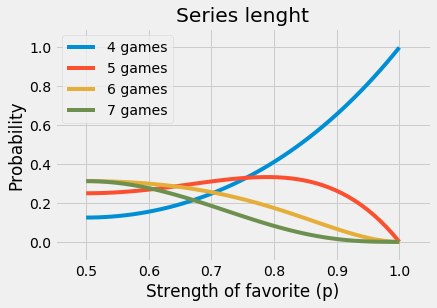

In [5]:
import pylab as py
import matplotlib as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
fig,ax = py.subplots()
f4 = lambda x: (1+6*x**2+x**4)/8.0
f5 = lambda x: (1+2*x**2-3*x**4)/4.0
f6 = lambda x: (1-1*x**2-1*x**4+x**6)*5/16.0
f7 = lambda x: (1-3*x**2+3*x**4-x**6)*5/16.0
xx = py.linspace(0.5,1.0)
ax.plot(xx,map(f4,2*xx-1.0),label='4 games')
ax.plot(xx,map(f5,2*xx-1.0),label='5 games')
ax.plot(xx,map(f6,2*xx-1.0),label='6 games')
ax.plot(xx,map(f7,2*xx-1.0),label='7 games')
ax.set_xlim(0.45,1.05)
ax.set_ylim(-0.1,1.1)
ax.set_ylabel('Probability')
ax.set_xlabel('Strength of favorite (p)')
ax.legend(loc='upper left')
ax.set_title('Series lenght')

We see that when the favorite is very dominant (about 80% chance of winning each game), the series likely ends in four games. If the teams are evenly split, the series can go any number of games.

Finally, I plot the average number of games for the series depending on the strenght of favoritism. It is, as expected a decreasing function of the favoritism, dropping from about $5.8$ when teams are evenly split to $4.0$ when the favorite is very dominant.

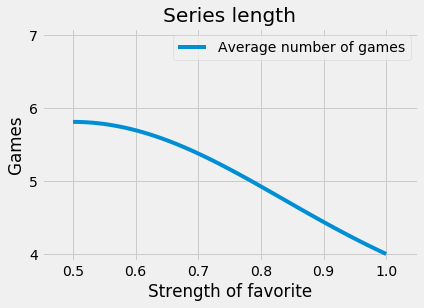

In [7]:
fig,ax = py.subplots()
f4 = lambda x: (1+6*x**2+x**4)/8.0
f5 = lambda x: (1+2*x**2-3*x**4)/4.0
f6 = lambda x: (1-1*x**2-1*x**4+x**6)*5/16.0
f7 = lambda x: (1-3*x**2+3*x**4-x**6)*5/16.0
xx = py.linspace(0.5,1.0)
yy = py.array(map(lambda x:4*f4(x)+5*f5(x)+6*f6(x)+7*f7(x),2*xx-1.0))
sd = py.sqrt(py.array(map(lambda x:0**2*f4(x)+1**2*f5(x)+2**2*f6(x)+3**2*f7(x),2*xx-1.0)) - (yy-4)**2)
ax.set_xlim(0.45,1.05)
ax.set_ylim(4-0.1,7.1)
ax.set_yticks([4,5,6,7])
ax.set_ylabel('Games')
ax.set_xlabel('Strength of favorite')
#ax.fill_between(xx, yy+sd, yy-sd,alpha=0.2)
ax.plot(xx,yy,label='Average number of games')
ax.set_title('Series length')
ax.legend(loc='upper right')